In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score,classification_report
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [406]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/779914/fen_train.csv')

In [373]:
df

,signal_id,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p120,p121,p122,p123,p124,p125,p126,p127,p128,label
0,3,-0.177789,-0.081874,-0.096131,-0.099436,-0.098867,-0.105427,-0.083472,-0.074000,-0.065275,...,-0.068265,-0.059327,-0.013739,0.009359,0.009645,0.070163,0.108443,0.127638,0.099169,0
1,4,0.010337,0.010733,0.117607,0.259589,0.339589,0.329296,0.281260,0.115658,-0.172955,...,0.370135,0.344097,0.158927,-0.102145,-0.301141,-0.148649,0.263631,0.480440,0.420327,0
2,5,-0.221846,-0.247773,-0.187847,-0.181616,-0.108799,-0.099480,-0.083244,-0.054944,-0.100919,...,-0.086089,-0.080394,-0.089625,-0.122950,-0.074273,-0.018595,0.054752,0.097544,0.067837,0
3,6,0.411835,0.513823,0.558802,0.380244,0.210830,0.174093,0.102772,-0.051933,-0.237179,...,0.113856,0.014483,-0.112094,-0.133700,-0.024104,-0.042590,-0.062838,-0.078137,-0.194478,0
4,7,0.221770,-0.026863,-0.249447,-0.340728,-0.288676,-0.207364,-0.155768,-0.091768,-0.119012,...,-0.216549,-0.167078,-0.077491,-0.115439,-0.126838,-0.087323,-0.115734,-0.102995,-0.098657,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,1214,0.411055,0.168638,-0.198538,-0.300685,0.056328,0.617390,0.722862,0.370691,-0.013178,...,-0.244818,-0.192781,-0.172304,-0.145502,-0.125380,-0.012973,0.055567,0.017957,0.104189,0
650,1218,0.104295,0.109067,0.045116,-0.033823,-0.072836,-0.054253,-0.014003,0.027218,0.054011,...,-0.016502,-0.022746,-0.041478,-0.011162,-0.018928,-0.004817,0.032872,0.027806,0.033331,0
651,1219,-0.104234,-0.085259,-0.043942,-0.030790,0.026148,0.028789,0.004455,0.058006,0.125277,...,-0.159490,-0.126357,-0.094226,-0.072689,-0.132456,-0.135855,-0.079241,-0.015215,0.021913,0
652,1221,0.031189,0.051451,0.176866,0.262605,0.201261,0.132246,-0.044051,-0.280172,-0.340040,...,-0.138272,-0.143904,-0.134502,-0.112658,-0.045430,0.038033,0.091223,0.180421,0.522160,0


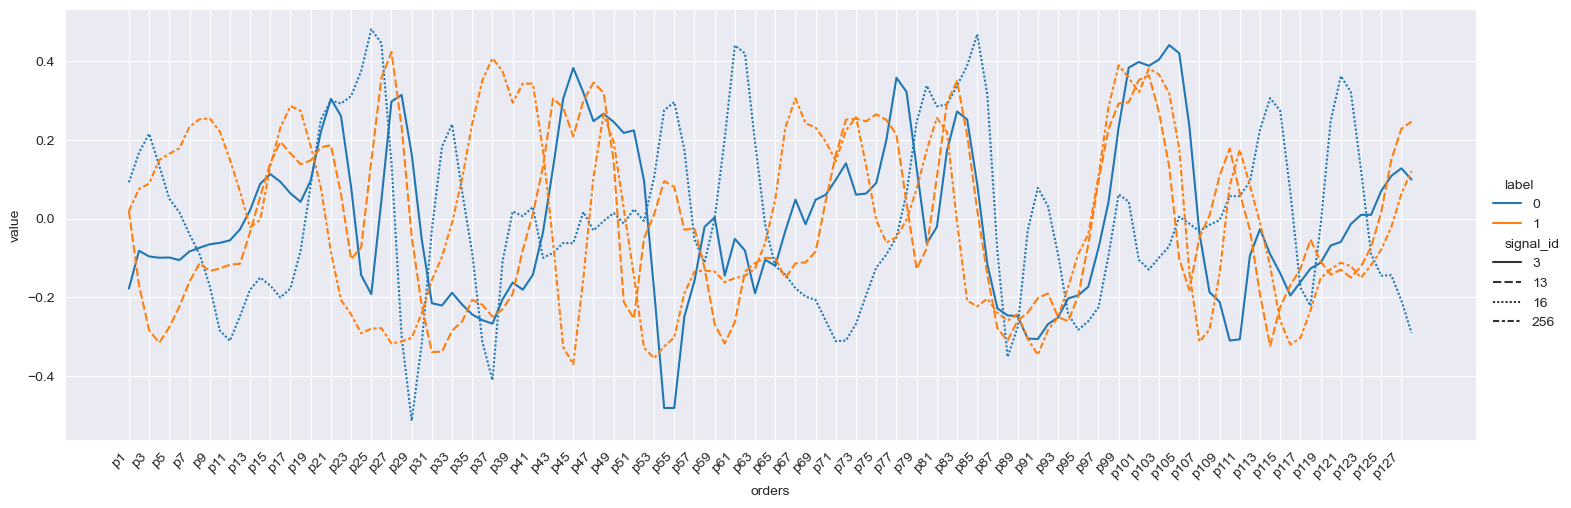

In [8]:
df_melt = df.melt(
    id_vars="signal_id",
    value_vars=[f"p{i}" for i in range(1, 128 + 1)],
    var_name="orders",
    value_name="value",
).merge(df[["signal_id", "label"]], on="signal_id", how="left")

tmp = df_melt[df_melt.signal_id.isin([3, 13, 16, 256])]

sns.relplot(
    data=tmp,
    x="orders",
    y="value",
    hue="label",
    style="signal_id",
    kind="line",
    aspect=3,
).set_xticklabels(rotation=45, horizontalalignment="right", step=2);

In [ ]:
grouped = df.groupby(df['label'])

In [28]:
melted_df_mean = pd.melt(
    grouped.mean().reset_index(),
    id_vars="label",
    value_vars=grouped.mean().reset_index().columns.tolist()[2:],
)
melted_df_min= pd.melt(
    grouped.min().reset_index(),
    id_vars="label",
    value_vars=grouped.min().reset_index().columns.tolist()[2:],
)
melted_df_max = pd.melt(
    grouped.max().reset_index(),
    id_vars="label",
    value_vars=grouped.max().reset_index().columns.tolist()[2:],
)
melted_df_std = pd.melt(
    grouped.std().reset_index(),
    id_vars="label",
    value_vars=grouped.std().reset_index().columns.tolist()[2:],
)

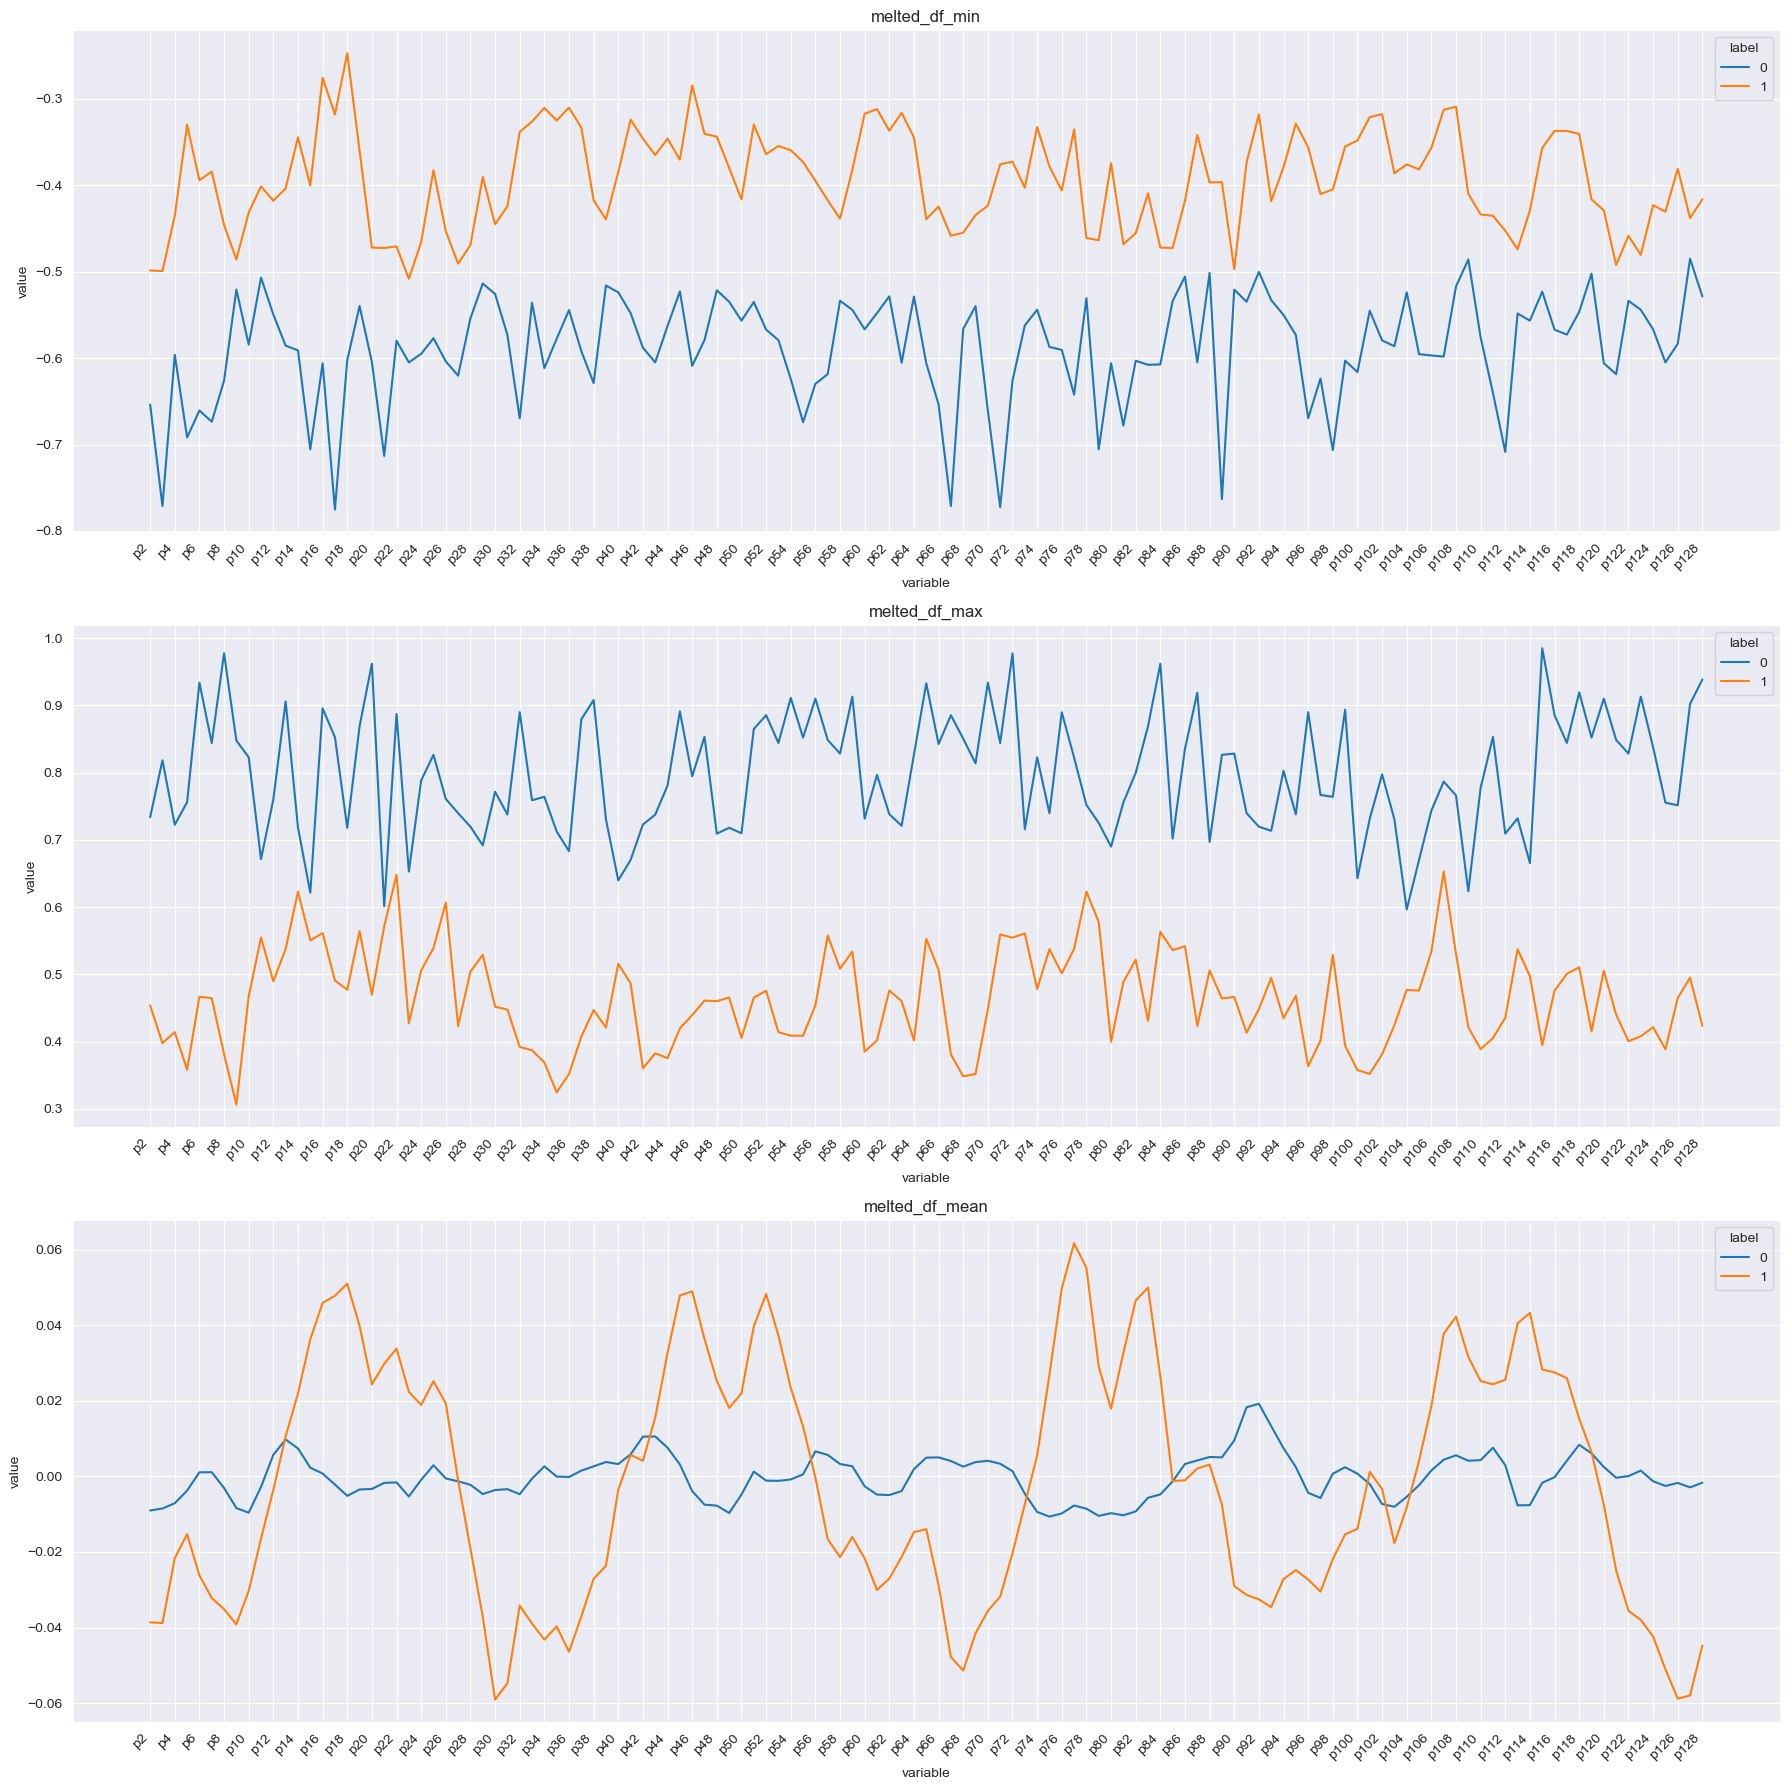

In [29]:
fig, axes = plt.subplots(3, 1, figsize=(18, 18))

sns.lineplot(x='variable', y='value', hue='label', data=melted_df_min, ax=axes[0])
axes[0].set_title("melted_df_min")
current_xticks = axes[0].get_xticks()
current_xticklabels = axes[0].get_xticklabels()
axes[0].set_xticks(current_xticks[::2])
axes[0].set_xticklabels(current_xticklabels[::2], rotation=45, horizontalalignment="right")

sns.lineplot(x='variable', y='value', hue='label', data=melted_df_max, ax=axes[1])
axes[1].set_title("melted_df_max")
current_xticks = axes[1].get_xticks()
current_xticklabels = axes[1].get_xticklabels()
axes[1].set_xticks(current_xticks[::2])
axes[1].set_xticklabels(current_xticklabels[::2], rotation=45, horizontalalignment="right")

sns.lineplot(x='variable', y='value', hue='label', data=melted_df_mean, ax=axes[2])
axes[2].set_title("melted_df_mean")
current_xticks = axes[2].get_xticks()
current_xticklabels = axes[2].get_xticklabels()
axes[2].set_xticks(current_xticks[::2])
axes[2].set_xticklabels(current_xticklabels[::2], rotation=45, horizontalalignment="right")

# Показать графики
plt.tight_layout()
plt.show()

In [516]:
def diff_summ(row):
    return (np.abs((np.diff(row))) <= 0.05).sum()

def dispersion(row):
    return (np.diff(row)).var()

In [407]:
df = df.drop('signal_id', axis=1)

In [513]:
new_features_df = pd.DataFrame()

In [514]:
# Computing the first derivatives
first_derivative = df.iloc[:, :-1].diff(axis=1)
first_derivative = first_derivative.iloc[:, 1:]

In [515]:
abs_first_derivative = np.abs(first_derivative)
# Calculating the Mean and Variance of a Derived Module
mean_abs_derivative = abs_first_derivative.mean(axis=1)
var_abs_derivative = abs_first_derivative.std(axis=1)

new_features_df['mean_abs_derivative'] =  mean_abs_derivative
new_features_df['var_abs_derivative'] = var_abs_derivative

# Calculate the number of derivatives close to zero (by a given threshold)
close_to_threshold = np.sum( (abs_first_derivative.iloc[:,:].sort_values(by=list(abs_first_derivative.columns[:])) <=
                              (mean_abs_derivative.std() + mean_abs_derivative.min() + mean_abs_derivative.mean()) / 2.718) , axis=1)

new_features_df['close_to_threshold'] = close_to_threshold/1000

new_features_df['var_abs_derivative_X_mean_abs_derivative'] = new_features_df['var_abs_derivative'] * new_features_df['mean_abs_derivative']

new_features_df['label'] = df['label']

new_features_df = new_features_df.query(' var_abs_derivative < 0.110 ' )
new_features_df = new_features_df.drop(['var_abs_derivative', 'mean_abs_derivative'], axis=1)

In [517]:
new_features_df['row_diff_summ'] = df.iloc[:, :-1].apply(diff_summ, axis=1).copy()
new_features_df['row_dispersion'] = df.iloc[:, :-1].apply(dispersion, axis=1).copy()

In [518]:
new_features_df['label'] = df['label']

In [519]:
new_features_df

,close_to_threshold,var_abs_derivative_X_mean_abs_derivative,label,row_diff_summ,row_dispersion
0,0.070,0.005304,0,70,0.010562
1,0.048,0.010103,0,48,0.020160
2,0.066,0.005103,0,66,0.010166
3,0.057,0.006451,0,56,0.012968
4,0.069,0.003994,0,68,0.007962
...,...,...,...,...,...
649,0.047,0.010195,0,47,0.020328
650,0.096,0.001549,0,95,0.003085
651,0.069,0.004679,0,69,0.009321
652,0.041,0.009958,0,41,0.019968


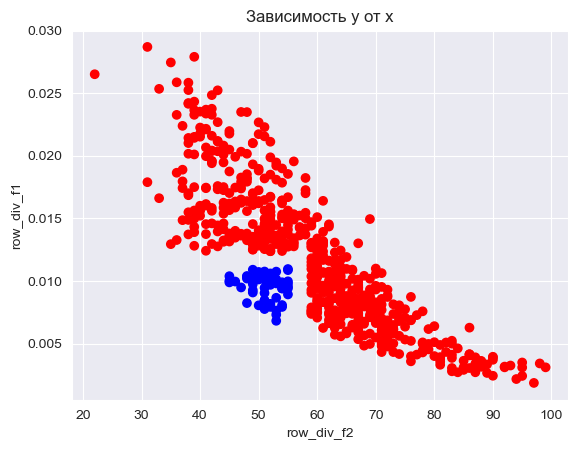

In [520]:
colors = {0: 'red', 1: 'blue'}
plt.scatter(new_features_df['row_diff_summ'], new_features_df['row_dispersion'], c=new_features_df['label'].apply(lambda x: colors[x]))

plt.title('Dependency y on x')
plt.xlabel('row_div_f2')
plt.ylabel('row_div_f1')
plt.show()

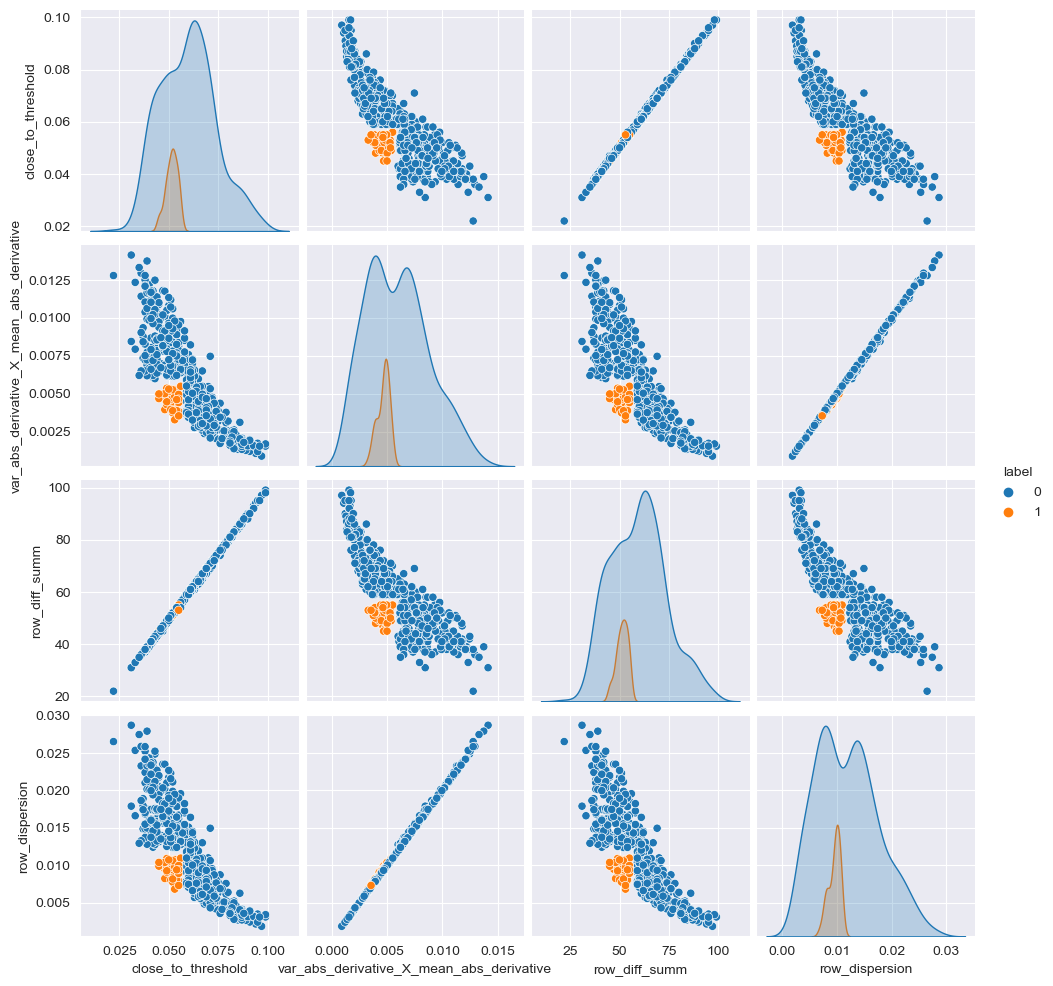

In [521]:
sns.pairplot(new_features_df, hue='label')
plt.show()

In [522]:
new_features_df['label'].value_counts()

0    566
1     51
Name: label, dtype: int64

In [523]:
# Make new DataFrame
new_df = new_features_df.copy()

class_0 = new_df[new_df['label'] == 0]
class_1 = new_df[new_df['label'] == 1]

# Select a random 500 entries from a larger class
class_0_sample = class_0.sample(500, random_state=42)

# Combine reduced class 0 with class 1 and mix
balanced_df = pd.concat([class_0_sample, class_1])
balanced_df = shuffle(balanced_df, random_state=42)

# Divide balanced DataFrame into training and test samples using stratification
X_balanced = balanced_df.drop(columns=["label"])
y_balanced = balanced_df['label']
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, stratify=y_balanced, random_state=42)

In [547]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, f1_score

# Define options for selecting hyperparameters
param_grid = {
    'n_estimators': [ 700, 1000, 1300, 1500 ], # 300, 500
    'max_depth': [  6, 8,4 ], # 10, 12
    'num_leaves': [ 8, 16, 32, 4 ], # 6
    'learning_rate': [ 0.01, 0.001, 0.05, 0.005],
    # 'min_child_samples': [20, 30, 40],
    # 'min_split_gain': [0.0, 0.1, 0.2],
    # 'subsample': [0.8, 0.9, 1.0],
    # 'colsample_bytree': [0.8, 0.9, 1.0]
}

# new LightGBM model with GPU
lgbm_model = lgb.LGBMClassifier(device='gpu', class_weight='balanced', lambda_l1=0.5, lambda_l2=0.5, random_state=42)


#  GridSearchCV
grid_search = GridSearchCV(estimator=lgbm_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Train model with hyperparameter selection
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params, '\n')

# Train an LightGBM with best parameters
best_lgbm_model = lgb.LGBMClassifier(**best_params, device='gpu', random_state=42)
best_lgbm_model.fit(X_train, y_train)

# apply cross-validation
cv_scores = cross_val_score(best_lgbm_model, X_train, y_train, cv=3)
print("cross-validation mean accuracy with best parameters:", cv_scores.mean())

# Evaluate model performance on test sample with best parameters
y_pred = best_lgbm_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
test_f1_score = f1_score(y_test, y_pred)

print("Test accuracy with best parameters:", test_accuracy)
print("Test F1 with best parameters:", test_f1_score)

Fitting 3 folds for each of 192 candidates, totalling 576 fits
[LightGBM] [Warning] lambda_l1 is set=0.5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5
[LightGBM] [Warning] lambda_l2 is set=0.5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5
Best parameters: {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 700, 'num_leaves': 8} 

cross-validation mean accuracy with best parameters: 1.0
Test accuracy with best parameters: 0.989247311827957
Test F1 with best parameters: 0.9285714285714286


In [525]:
# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.989247311827957
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       171
           1       1.00      0.87      0.93        15

    accuracy                           0.99       186
   macro avg       0.99      0.93      0.96       186
weighted avg       0.99      0.99      0.99       186



In [526]:
print(y_pred.shape, y_pred.sum(), y_test.sum())

(186,) 13 15


In [527]:
data = pd.read_csv('https://stepik.org/media/attachments/lesson/779914/fen_test.csv')

In [528]:
data

,signal_id,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p119,p120,p121,p122,p123,p124,p125,p126,p127,p128
0,0,0.048383,0.075671,0.085861,0.087598,0.133466,0.239305,0.324572,0.264262,0.129173,...,0.138940,0.256082,0.344688,0.252258,0.034918,-0.141454,-0.132326,0.092708,0.290870,0.305827
1,1,0.092534,0.209535,0.390794,0.442508,0.429571,0.451524,0.310780,-0.075440,-0.297661,...,0.187563,0.234320,0.270503,0.328785,0.347625,0.426766,0.299061,-0.060183,-0.177051,-0.083738
2,8,0.045240,0.182892,0.293203,0.367133,0.341595,0.315698,0.343855,0.301613,0.243359,...,0.368040,0.290899,0.207095,0.242306,0.259203,0.210387,0.212587,0.076684,-0.203899,-0.346122
3,9,0.182414,-0.337581,-0.080484,0.393137,0.373783,0.112220,-0.219613,-0.355965,-0.302890,...,0.127023,0.275310,0.192306,0.073698,0.243584,0.276032,0.238793,0.275950,0.256591,0.360451
4,10,0.378236,0.137916,-0.063737,-0.201264,-0.067326,0.127712,0.221648,0.257548,0.093588,...,-0.202586,0.001186,0.190594,0.253443,0.168408,0.025194,-0.048555,-0.190483,-0.387497,-0.387843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,1216,-0.271647,-0.279556,-0.261024,-0.240678,-0.198738,-0.050845,0.187136,0.400810,0.466261,...,0.432804,0.430316,0.360257,0.128453,-0.081609,-0.308643,-0.311576,-0.065489,-0.087348,-0.105786
428,1217,0.437164,0.127592,-0.304225,-0.488055,-0.278895,-0.020672,0.125794,0.113607,-0.144910,...,0.460892,0.331173,-0.004532,-0.298237,-0.354807,-0.211790,-0.045861,0.074650,0.046221,-0.131905
429,1223,-0.133246,-0.132675,-0.155113,-0.079316,-0.035889,0.006239,0.001766,-0.040629,0.009979,...,-0.123037,-0.088129,-0.046241,-0.026337,0.024571,0.029573,0.044202,0.117704,0.276104,0.383572
430,1224,-0.126366,-0.189592,-0.112701,-0.136277,-0.137174,-0.033034,0.029840,0.017674,-0.019952,...,-0.038111,-0.028967,-0.025562,-0.046228,-0.069375,-0.064908,-0.053884,-0.005577,0.110611,0.214029


In [529]:
data.shape

(432, 129)

In [530]:
data_test = data.copy()
data_test = data_test.drop('signal_id', axis=1)
data_test.shape

(432, 128)

In [531]:
new_dataset_test = pd.DataFrame()

In [532]:
first_derivative_ = data_test.diff(axis=1)
first_derivative_ = first_derivative_.iloc[:, 1:]

abs_first_derivative_ = np.abs(first_derivative_)

In [533]:
mean_abs_derivative_ = abs_first_derivative_.mean(axis=1)
var_abs_derivative_ = abs_first_derivative_.std(axis=1)

new_dataset_test['mean_abs_derivative'] = mean_abs_derivative_
new_dataset_test['var_abs_derivative'] = var_abs_derivative_
new_dataset_test['var_abs_derivative_X_mean_abs_derivative'] = new_dataset_test['mean_abs_derivative'] * new_dataset_test['var_abs_derivative']

close_to_threshold_ = np.sum( (abs_first_derivative_.iloc[:,:].sort_values(by=list(abs_first_derivative_.columns[:])) <= (mean_abs_derivative_.std()  + mean_abs_derivative_.min() + mean_abs_derivative_.mean()) / 2.718) , axis=1)

new_dataset_test['close_to_threshold'] = close_to_threshold_/1000

In [538]:
new_dataset_test['row_diff_summ'] = data_test.apply(diff_summ, axis=1).copy()
new_dataset_test['row_dispersion'] = data_test.apply(dispersion, axis=1).copy()

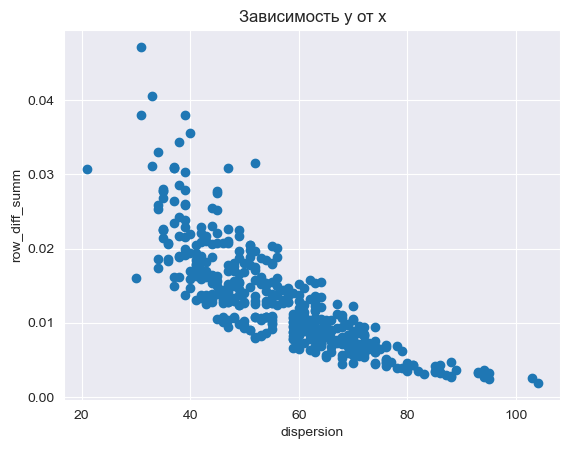

In [541]:
plt.scatter(new_dataset_test['row_diff_summ'], new_dataset_test['row_dispersion'])

plt.title('Зависимость y от x')
plt.xlabel('dispersion')
plt.ylabel('row_diff_summ')
plt.show()

In [542]:
X_train.columns.tolist()

['close_to_threshold',
 'var_abs_derivative_X_mean_abs_derivative',
 'row_diff_summ',
 'row_dispersion']

In [543]:
correct_order = X_train.columns.tolist()
new_dataset_test = new_dataset_test[correct_order]

In [544]:
new_dataset_test.shape

(432, 4)

In [545]:
predictions = best_lgbm_model.predict(new_dataset_test)
result_V_4 = pd.DataFrame()
result_V_4['signal_id'] = data['signal_id']
result_V_4['label'] = predictions
result_V_4['label'].value_counts()

0    400
1     32
Name: label, dtype: int64

In [546]:
result_V_4.to_csv('result_V_9_9_2,9.csv', index=False) # accuracy=1.0